In [2]:
import numpy as np
%matplotlib inline

In [2]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print('X: \n {}'.format(x))

X: 
 [[1 2 3]
 [4 5 6]]


In [3]:
from scipy import sparse

In [10]:
eye = np.eye(4)
# eye[0][1] = 1
print('Numpy array: \n {}'.format(eye))

Numpy array: 
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [11]:
sparse_matrix = sparse.csc_matrix(eye)
print('\nScipy sparse CSR matrix: \n{}'.format(sparse_matrix))


Scipy sparse CSR matrix: 
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [12]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print('COO representation: \n{}'.format(eye_coo))

COO representation: 
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [13]:
import matplotlib.pyplot as plt

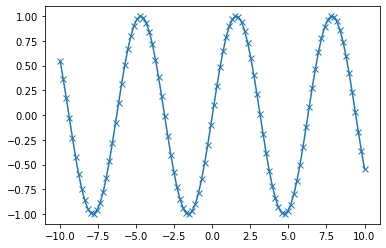

In [14]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker='x')

In [21]:
import pandas as pd

In [22]:
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
 }
data_pandas = pd.DataFrame(data)
data_pandas

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [23]:
data_pandas[data_pandas.Age > 30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


In [1]:
import mglearn

In [4]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [5]:
print('Keys of iris_dataset: \n{}'.format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
print(iris_dataset['DESCR'][: 197]+'\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predict
...


In [9]:
print('Target names: {}'.format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [10]:
print('Feature names: {}'.format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print('Type of data: {}'.format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


In [13]:
print('Shape of data: {}'.format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [14]:
print('First five rows of data: \n {}'.format(iris_dataset['data'][:5]))

First five rows of data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
print('Type of target: {}'.format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [16]:
print('Shape of target: {}'.format(iris_dataset['target'].shape))

Shape of target: (150,)


In [17]:
print('Target: \n{}'.format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 衡量模型是否成功：训练数据与测试数据

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=39)

In [22]:
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [23]:
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [27]:
import pandas as pd

In [28]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

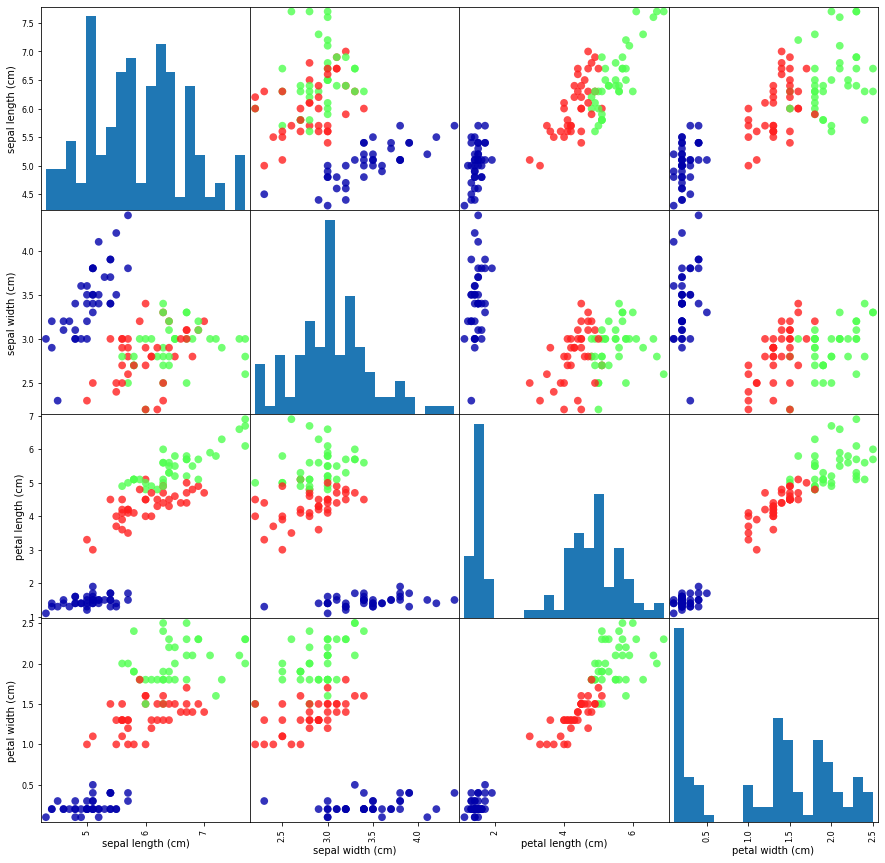

In [32]:
from pandas.plotting import scatter_matrix
grr = scatter_matrix(iris_dataframe, 
                     c=y_train, 
                     figsize=(15, 15), 
                     marker='o', 
                     hist_kwds={'bins': 20}, 
                     s=60, 
                     alpha=.8, 
                     cmap=mglearn.cm3)

## Building Your First Model: k-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
X_new = np.array([[5, 2.9, 1, .2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [41]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(iris_dataset['target_names'][prediction]))

Prediction: ['setosa']


In [44]:
y_pred = knn.predict(X_test)
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 [0 0 2 1 0 0 2 0 2 2 1 0 2 1 1 1 2 2 2 0 2 0 0 1 1 0 1 1 2 1 1 0 2 1 1 0 2
 1]


In [46]:
print('Test set score : {:.2f}'.format(np.mean(y_pred == y_test)))

Test set score : 0.97


In [48]:
print('Test set score : {:.2f}'.format(knn.score(X_test, y_test)))

Test set score : 0.97
